In [2]:
import pandas as pd

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:

#Would you say your mood improved significantly after the session?
data_1 = pd.read_excel("/Users/macbookretina/Desktop/Session_Exit_Survey2021-07-22_14_51_18.xlsx", 
                       usecols = [0,2], parse_dates=True, 
                       names=['Submission Date', 'Mood Improvement'],
                       dtype={'Submission Date': str, 'Mood Improvement': str})

#mood_data_1 = data_1.sort_values('Mood Ratings')
mood_data_1 = data_1
#mood_data_1 = mood_data_1.dropna()
mood_data_1["Group"] = 1
mood_data_1

,Submission Date,Mood Improvement,Group
0,2021/06/13 19:18:05,Yes,1
1,2021/06/13 19:18:01,Yes,1
2,2021/05/10 19:32:28,Yes,1
3,2021/05/10 19:20:49,Yes,1
4,2021/05/10 19:19:39,Yes,1
...,...,...,...
113,2020/07/24 18:29:04,Yes,1
114,2020/07/24 18:28:47,Yes,1
115,2020/07/17 18:09:29,Yes,1
116,2020/07/17 18:08:26,No,1


In [5]:
#art circle

data_2 = pd.read_excel("/Users/macbookretina/Desktop/Session Exit Survey - Art Circle (Responses).xlsx", 
                       usecols = [0,2], parse_dates=True, 
                       names=['Submission Date', 'Mood Improvement'],
                       dtype={'Submission Date': str, 'Mood Improvement': str})

#mood_data_2 = data_2.sort_values('Mood Ratings')
mood_data_2 = data_2
#mood_data_1 = mood_data_1.dropna()
mood_data_2["Group"] = 2
mood_data_2

,Submission Date,Mood Improvement,Group
0,2021-05-03 00:32:17.294000,Maybe,2
1,2021-05-03 00:32:29.723000,No,2
2,2021-05-03 00:32:41.258000,Yes,2
3,2021-05-10 00:24:20.862000,Maybe,2
4,2021-05-10 00:24:23.035000,Yes,2
5,2021-05-10 00:24:23.774000,Yes,2
6,2021-05-10 00:24:40.290000,Yes,2
7,2021-05-17 00:29:46.456000,Yes,2
8,2021-05-17 00:29:58.883000,Maybe,2
9,2021-05-24 00:22:27.680000,Yes,2


In [6]:
#queer circle

data_3 = pd.read_excel("/Users/macbookretina/Desktop/Exit Survey - Queer Circle (Responses).xlsx", 
                       usecols = [0,2], parse_dates=True, 
                       names=['Submission Date', 'Mood Improvement'],
                       dtype={'Submission Date': str, 'Mood Improvement': str})

#mood_data_3 = data_3.sort_values('Mood Ratings')
mood_data_3 = data_3
#mood_data_1 = mood_data_1.dropna()
mood_data_3["Group"] = 3
mood_data_3

,Submission Date,Mood Improvement,Group
0,2021-05-01 19:26:24.926000,No,3
1,2021-05-04 00:07:17.370000,No,3
2,2021-05-04 00:08:24.891000,Yes,3
3,2021-05-04 18:56:25.749000,Maybe,3
4,2021-05-08 20:11:17.968000,Yes,3
5,2021-05-11 00:02:13.220000,Yes,3
6,2021-05-11 00:02:42.499000,Maybe,3
7,2021-05-11 04:01:03.282000,Yes,3
8,2021-05-29 20:03:57.524000,Maybe,3


In [13]:


#What I learned from this session can make positive changes towards my life. (1= strongly disagree, 3 = Neutral, 5 = strongly agree).
data_4 = pd.read_excel("/Users/macbookretina/Desktop/Session_Exit_Survey2021-07-22_14_51_18.xlsx", 
                       usecols = [0,3], parse_dates=True, 
                       names=['Submission Date', 'Effect'],
                       dtype={'Submission Date': str, 'Effect': int})

#mood_data_4 = data_4.sort_values('Mood Ratings')
mood_data_4 = data_4
#mood_data_1 = mood_data_1.dropna()
mood_data_4["Group"] = 4
mood_data_4

,Submission Date,Effect,Group
0,2021/06/13 19:18:05,5,4
1,2021/06/13 19:18:01,4,4
2,2021/05/10 19:32:28,5,4
3,2021/05/10 19:20:49,4,4
4,2021/05/10 19:19:39,5,4
...,...,...,...
113,2020/07/24 18:29:04,5,4
114,2020/07/24 18:28:47,5,4
115,2020/07/17 18:09:29,5,4
116,2020/07/17 18:08:26,3,4


In [14]:
#art circle

data_5 = pd.read_excel("/Users/macbookretina/Desktop/Session Exit Survey - Art Circle (Responses).xlsx", 
                       usecols = [0,3], parse_dates=True, 
                       names=['Submission Date', 'Effect'],
                       dtype={'Submission Date': str, 'Effect': int})

#mood_data_5 = data_5.sort_values('Mood Ratings')
mood_data_5 = data_5
#mood_data_1 = mood_data_1.dropna()
mood_data_5["Group"] = 5
mood_data_5

,Submission Date,Effect,Group
0,2021-05-03 00:32:17.294000,4,5
1,2021-05-03 00:32:29.723000,4,5
2,2021-05-03 00:32:41.258000,4,5
3,2021-05-10 00:24:20.862000,3,5
4,2021-05-10 00:24:23.035000,3,5
5,2021-05-10 00:24:23.774000,4,5
6,2021-05-10 00:24:40.290000,3,5
7,2021-05-17 00:29:46.456000,4,5
8,2021-05-17 00:29:58.883000,4,5
9,2021-05-24 00:22:27.680000,4,5


In [15]:
#queer circle

data_6 = pd.read_excel("/Users/macbookretina/Desktop/Exit Survey - Queer Circle (Responses).xlsx", 
                       usecols = [0,3], parse_dates=True, 
                       names=['Submission Date', 'Effect'],
                       dtype={'Submission Date': str, 'Effect': int})

#mood_data_6 = data_6.sort_values('Mood Ratings')
mood_data_6 = data_6
#mood_data_1 = mood_data_1.dropna()
mood_data_6["Group"] = 6
mood_data_6

,Submission Date,Effect,Group
0,2021-05-01 19:26:24.926000,1,6
1,2021-05-04 00:07:17.370000,3,6
2,2021-05-04 00:08:24.891000,2,6
3,2021-05-04 18:56:25.749000,3,6
4,2021-05-08 20:11:17.968000,3,6
5,2021-05-11 00:02:13.220000,2,6
6,2021-05-11 00:02:42.499000,4,6
7,2021-05-11 04:01:03.282000,2,6
8,2021-05-29 20:03:57.524000,4,6


In [18]:
#append improvement

data_imp_1 = mood_data_1.append(mood_data_2)

data_imp = data_imp_1.append(mood_data_3)

data_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 8
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Submission Date   143 non-null    object
 1   Mood Improvement  143 non-null    object
 2   Group             143 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.5+ KB


In [20]:
#append effect

data_eff_1 = mood_data_4.append(mood_data_5)

data_eff = data_eff_1.append(mood_data_6)

data_eff.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 8
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Submission Date  143 non-null    object
 1   Effect           143 non-null    int64 
 2   Group            143 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.5+ KB


In [22]:
data_imp["index"] = 0

for i in range(143):
    data_imp.iloc[i, data_imp.columns.get_loc('index')] = i
    
    
data_imp.set_index('index')

,Submission Date,Mood Improvement,Group
index,,,
0,2021/06/13 19:18:05,Yes,1
1,2021/06/13 19:18:01,Yes,1
2,2021/05/10 19:32:28,Yes,1
3,2021/05/10 19:20:49,Yes,1
4,2021/05/10 19:19:39,Yes,1
...,...,...,...
138,2021-05-08 20:11:17.968000,Yes,3
139,2021-05-11 00:02:13.220000,Yes,3
140,2021-05-11 00:02:42.499000,Maybe,3


In [23]:
data_eff["index"] = 0

for i in range(143):
    data_eff.iloc[i, data_eff.columns.get_loc('index')] = i
    
    
data_eff.set_index('index')

,Submission Date,Effect,Group
index,,,
0,2021/06/13 19:18:05,5,4
1,2021/06/13 19:18:01,4,4
2,2021/05/10 19:32:28,5,4
3,2021/05/10 19:20:49,4,4
4,2021/05/10 19:19:39,5,4
...,...,...,...
138,2021-05-08 20:11:17.968000,3,6
139,2021-05-11 00:02:13.220000,2,6
140,2021-05-11 00:02:42.499000,4,6


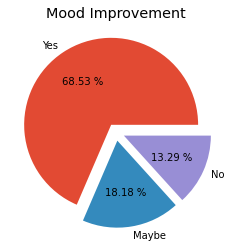

In [36]:
#Would you say your mood improved significantly after the session?


yes = data_imp.loc[data_imp["Mood Improvement"] == 'Yes'].count()[0]
maybe = data_imp.loc[data_imp["Mood Improvement"] == 'Maybe'].count()[0]
no = data_imp.loc[data_imp["Mood Improvement"] == 'No'].count()[0]

plt.style.use("ggplot")

labels = ['Yes', 'Maybe', 'No']

explode = (.1,.1,.1)

plt.pie([yes, maybe, no], labels = labels, autopct = "%.2f %%",explode = explode, radius = 1)

plt.title("Mood Improvement")

plt.show()

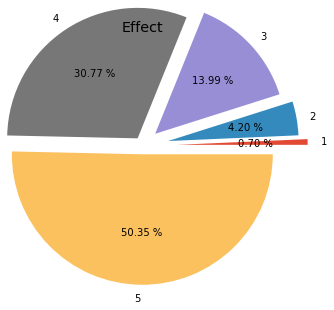

In [38]:
#What I learned from this session can make positive changes towards my life. 
#(1= strongly disagree, 3 = Neutral, 5 = strongly agree).


one = data_eff.loc[data_eff["Effect"] == 1].count()[0]
two = data_eff.loc[data_eff["Effect"] == 2].count()[0]
three = data_eff.loc[data_eff["Effect"] == 3].count()[0]
four = data_eff.loc[data_eff["Effect"] == 4].count()[0]
five = data_eff.loc[data_eff["Effect"] == 5].count()[0]

plt.style.use("ggplot")

labels = [1,2,3,4,5]

explode = (.4,.3,.2,.1,.1)

plt.pie([one, two, three, four, five], labels = labels, autopct = "%.2f %%",explode = explode, radius = 1.5)

plt.title("Effect")

plt.show()